In [202]:
#Descarga de Indices
import pandas_datareader.data as web
indices_tickers =["^IBEX","^GSPC","^DJI","^IXIC","^N225","^KS11","XIU.TO","^HSI","^MXX","^VIX"]

def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

indices_data = get_adj_closes(indices_tickers,start_date="2019-12-31",end_date="2020-03-30")
indices_data = indices_data[0:-1]

In [203]:
indices_data

Symbols,^IBEX,^GSPC,^DJI,^IXIC,^N225,^KS11,XIU.TO,^HSI,^MXX,^VIX
Date,,,,,,,,,,
2019-12-31,9549.200195,3230.780029,28538.439453,8972.599609,NaN,NaN,25.375320,28189.750000,43541.019531,13.780000
2020-01-02,9691.200195,3257.850098,28868.800781,9092.190430,NaN,2175.169922,25.444815,28543.519531,44437.230469,12.470000
2020-01-03,9646.599609,3234.850098,28634.880859,9020.769531,NaN,2176.459961,25.375320,28451.500000,44624.851562,14.020000
2020-01-06,9600.900391,3246.280029,28703.380859,9071.469727,23204.859375,2155.070068,25.474598,28226.189453,44495.300781,13.850000
2020-01-07,9579.799805,3237.179932,28583.679688,9068.580078,23575.720703,2175.540039,25.524237,28322.060547,44157.808594,13.790000
...,...,...,...,...,...,...,...,...,...,...
2020-03-24,6717.299805,2447.330078,20704.910156,7417.859863,18092.349609,1609.969971,19.420000,22663.490234,34371.531250,61.669998
2020-03-25,6942.399902,2475.560059,21200.550781,7384.299805,19546.630859,1704.760010,20.100000,23527.189453,35536.699219,63.950001
2020-03-26,7033.200195,2630.070068,22552.169922,7797.540039,18664.599609,1686.239990,20.520000,23352.339844,35706.570312,61.000000


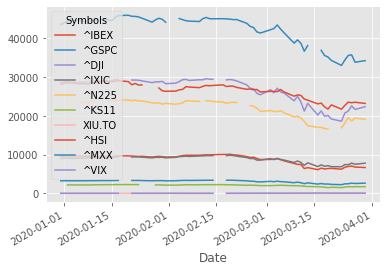

In [204]:
indices_data.plot()

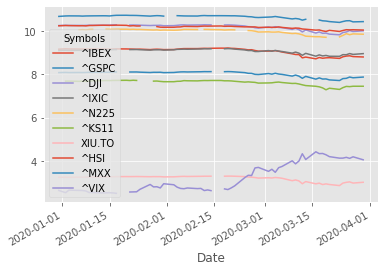

In [205]:
import numpy as np
log_indices = np.log(indices_data)
log_indices.plot()

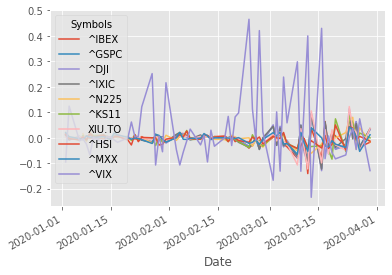

In [206]:
rend_indices = indices_data.pct_change()
rend_indices.plot()

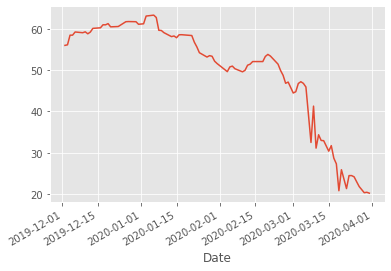

In [207]:
oil_data = get_adj_closes("CL=F",start_date="2019-12-01",end_date="2020-03-30")
oil_data.plot()

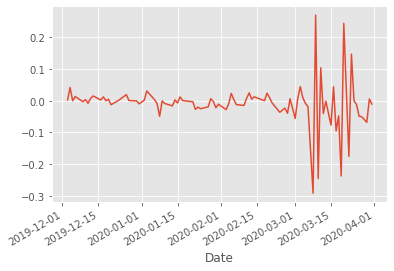

In [208]:
rend_oil = oil_data.pct_change()
rend_oil.plot()

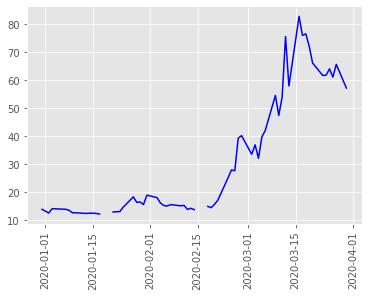

In [210]:

a = np.array(indices_data.index)
b = np.array(indices_data['^VIX'])
plt.xticks(rotation=90)
plt.plot(a,b,'b')
plt.show()

In [ ]:
#TRABJA DE AQUI PA BAJO NOE

# Analisis COVID-19 vs Stock Market
El índice VIX también se conoce comúnmente como índice de sentimiento del inversor, índice del miedo, índice VIX, cboe VIX o S&P500 VIX.

Pero, ¿qué información aporta el índice VIX? El VIX mide la volatilidad del mayor índice bursátil estadounidense, el S&P, que incluye 500 empresas, lo que lo convierte en un índice psicológico.

En los mercados, la volatilidad representa confianza o miedo.

Cuando el VIX tiende a 0, refleja un sentimiento de confianza de los inversores en la economía estadounidense.
Cuando el VIX tiende a 100, refleja pesimismo o miedo por parte de estos mismos inversores.
Hay tres niveles de alcance en el VIX cboe:

Entre 0 y 20: hay poca volatilidad en el mercado, los inversores tienen confianza y el S&P500 está en principio en tendencia alcista.
Entre 20 y 30: los inversores empiezan a preocuparse, lo que conduce a la volatilidad, la tendencia al alza del SP500 puede continuar pero también comenzar a revertirse.
Entre 30 y 100: ¡es el pánico por parte de los inversores! La volatilidad es particularmente alta y probablemente estamos asistiendo a una fuerte corrección o incluso a un colapso de los precios del SP500 y de los principales índices bursátiles.

In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.dates as mdates
import datetime
%matplotlib inline

In [230]:
data = pd.read_csv('C:/Users/1295779/Desktop/ITESO/6to/Simulacion de procesos financieros/Proyecto_SIMFIN/full_data.csv',index_col = 'location')
data_bk = pd.DataFrame(data)
data = pd.DataFrame(data)

In [231]:
def data_pais(pais):
    data_pais = pd.DataFrame(data.loc[pais])
    data_pais['date'] = pd.to_datetime(data_pais.date)
    return data_pais


In [232]:
USA = data_pais('United States')
WRL = data_pais('World')


In [233]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

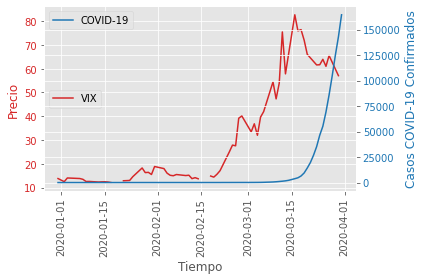

In [259]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Precio', color=color)
ax1.plot(indices_data.index, indices_data['^VIX'], color=color,label = 'VIX')
plt.legend(loc='center left')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation = 90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Casos COVID-19 Confirmados', color=color)  # we already handled the x-label with ax1
ax2.plot(USA['date'],USA['total_cases'], color=color,label = 'COVID-19')
ax2.tick_params(axis='y', labelcolor=color)


plt.legend(loc='upper left')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [260]:
%matplotlib notebook
title = 'COVID-19'
x = np.array(USA['date'])
y = np.array(USA['total_cases'])
overdose = pd.DataFrame(y,x)
overdose.columns = {title}
overdose

,COVID-19
2019-12-31,0
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,0
...,...
2020-03-27,85991
2020-03-28,104686
2020-03-29,124665
2020-03-30,143025


In [261]:
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=10)
    plt.setp(p.lines,linewidth=7)

<IPython.core.display.Javascript object>


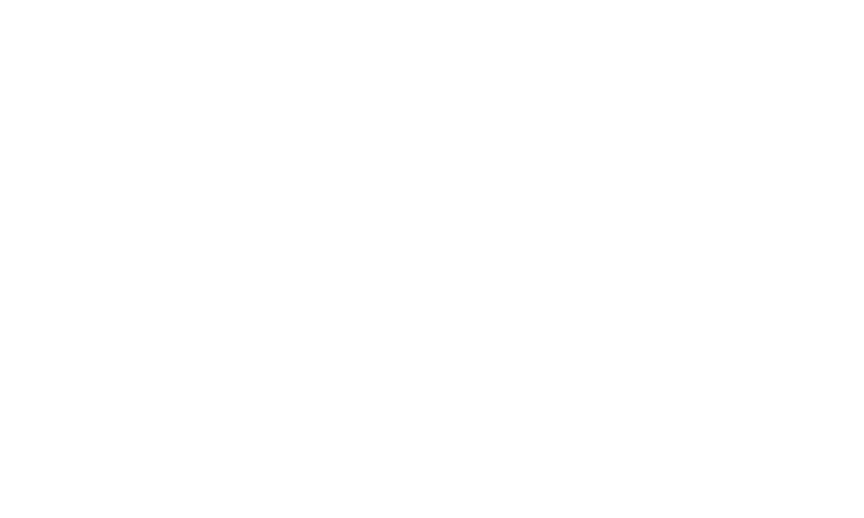

<IPython.core.display.Javascript object>


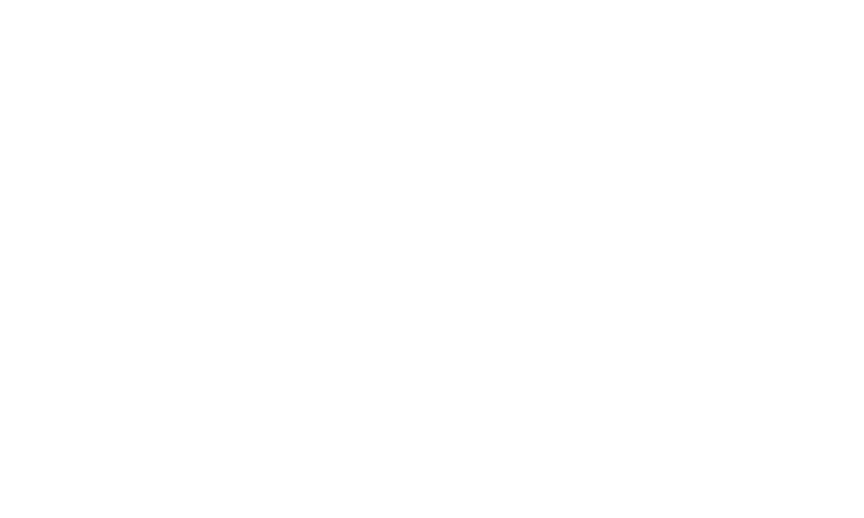

Traceback (most recent call last):
  File "C:\Users\1295779\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\1295779\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [262]:
fig = plt.figure(figsize=(10,6))
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=100, repeat=True)



plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xticks(rotation=90)
plt.title('COVID-CASES',fontsize=10)
plt.show()